# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import datetime as dt

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

585

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up list to hold reponse info
city_name = []
temp_max = []
lat = []
lng = []
humidity = []
w_speed = []
cloudiness = []
country = []
date = []

print("Beginning Data Retrieval")
print("------------------------------")

# iterate through the cities 
for i, city in enumerate(cities): 
    try:
        response = requests.get(query_url + city).json()
        temp_max.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        w_speed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        city_name.append(response['name'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        i_set, record = divmod(i, 50)
        print(f"Processing Record {record+1} of Set {i_set+1} | {city}")
        
    except KeyError:
        print("City not found. skipping...")
        pass

print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")


Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | yulara
Processing Record 4 of Set 1 | jalu
Processing Record 5 of Set 1 | sechura
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | talaya
City not found. skipping...
Processing Record 9 of Set 1 | kiri buru
Processing Record 10 of Set 1 | swellendam
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | beidao
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | tuktoyaktuk
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | ahipara
Processing Record 20 of Set 1 | hasaki
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of Set 1 | aktash
Processing Record 24 of Set 1 | 

Processing Record 7 of Set 5 | upernavik
Processing Record 8 of Set 5 | lashio
City not found. skipping...
Processing Record 10 of Set 5 | pinerovka
Processing Record 11 of Set 5 | sambava
Processing Record 12 of Set 5 | faro
Processing Record 13 of Set 5 | ambulu
Processing Record 14 of Set 5 | willowmore
City not found. skipping...
Processing Record 16 of Set 5 | lasa
Processing Record 17 of Set 5 | saldanha
City not found. skipping...
Processing Record 19 of Set 5 | severo-kurilsk
Processing Record 20 of Set 5 | novikovo
Processing Record 21 of Set 5 | townsville
Processing Record 22 of Set 5 | ribeira grande
Processing Record 23 of Set 5 | nanortalik
Processing Record 24 of Set 5 | nioro
City not found. skipping...
Processing Record 26 of Set 5 | vanimo
Processing Record 27 of Set 5 | los llanos de aridane
Processing Record 28 of Set 5 | kuusamo
Processing Record 29 of Set 5 | margate
Processing Record 30 of Set 5 | sorland
Processing Record 31 of Set 5 | bowen
Processing Record 32

Processing Record 15 of Set 9 | caravelas
Processing Record 16 of Set 9 | kamina
Processing Record 17 of Set 9 | hay river
Processing Record 18 of Set 9 | teya
Processing Record 19 of Set 9 | shahr-e babak
Processing Record 20 of Set 9 | coolum beach
Processing Record 21 of Set 9 | san pedro
Processing Record 22 of Set 9 | ilhabela
Processing Record 23 of Set 9 | faanui
Processing Record 24 of Set 9 | berlevag
Processing Record 25 of Set 9 | apatzingan
Processing Record 26 of Set 9 | hailun
Processing Record 27 of Set 9 | saint-joseph
Processing Record 28 of Set 9 | manakara
Processing Record 29 of Set 9 | zhezkazgan
Processing Record 30 of Set 9 | salalah
Processing Record 31 of Set 9 | nelson bay
Processing Record 32 of Set 9 | veraval
Processing Record 33 of Set 9 | eyl
Processing Record 34 of Set 9 | iquique
Processing Record 35 of Set 9 | ambovombe
Processing Record 36 of Set 9 | wanning
City not found. skipping...
Processing Record 38 of Set 9 | samarai
Processing Record 39 of Se

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create DataFrame
city_data = pd.DataFrame({ "City": city_name,
                           "Max Temp": temp_max,
                           "Lat": lat,
                           "Lng": lng,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Wind Speed": w_speed,
                           "Country": country,
                           "Date": date
})
city_data

,City,Max Temp,Lat,Lng,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,81.00,42.60,-73.97,63,77,1.01,US,1594833642
1,Bredasdorp,50.00,-34.53,20.04,71,1,6.93,ZA,1594833642
2,Yulara,39.20,-25.24,130.99,44,0,4.70,AU,1594833642
3,Jalu,95.68,29.03,21.55,17,0,8.95,LY,1594833607
4,Sechura,71.01,-5.56,-80.82,64,84,7.83,PE,1594833642
...,...,...,...,...,...,...,...,...,...
534,Viranşehir,92.50,37.24,39.76,13,6,8.66,TR,1594833753
535,Puerto Escondido,82.40,15.85,-97.07,74,75,5.82,MX,1594833754
536,Rome,82.00,43.21,-75.46,57,1,4.70,US,1594833724
537,Imbituba,60.80,-28.24,-48.67,59,1,6.93,BR,1594833754


In [7]:
city_data.count()

City          539
Max Temp      539
Lat           539
Lng           539
Humidity      539
Cloudiness    539
Wind Speed    539
Country       539
Date          539
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
city_data.describe()

# No cities have humidity > 100 %

,Max Temp,Lat,Lng,Humidity,Cloudiness,Wind Speed,Date
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,5.390000e+02
mean,69.445232,21.053488,22.148942,68.627087,49.617811,7.698831,1.594834e+09
std,15.148405,33.261718,90.326801,20.915036,37.792657,4.820459,7.780893e+01
min,30.200000,-54.800000,-175.200000,3.000000,0.000000,0.360000,1.594833e+09
25%,57.495000,-6.250000,-58.070000,58.000000,8.000000,4.460000,1.594834e+09
50%,71.600000,24.420000,26.880000,73.000000,49.000000,6.780000,1.594834e+09
75%,80.600000,50.140000,100.345000,84.000000,90.000000,10.290000,1.594834e+09
max,112.690000,78.220000,179.320000,100.000000,100.000000,33.820000,1.594834e+09


In [9]:
# Export the City_Data into a csv
city_data.to_csv("cities")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [10]:
# Analysis date
date  = dt.datetime.today().strftime("%m/%d/%Y")

## Latitude vs. Temperature Plot

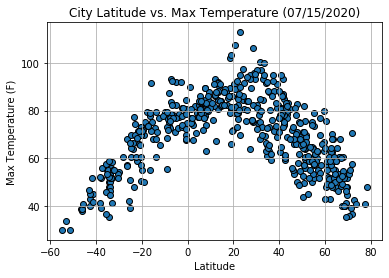

In [28]:
# Scatter Plot
x_values = city_data['Lat']
y_values = city_data['Max Temp']
plt.scatter(x_values,y_values , edgecolor = "Black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature ({date})')
plt.grid()
plt.savefig('Images/Lat_vs_Temp.png')
plt.show()

### Analysis: 
- Temperature is inversely related to latitude. It can be clearly seen from the plot that the weather becomes significantly warmer as we approach the equator. The highest temperatures are observed around 20 degrees north. This is due to the earths axis and the amount of direct sun rays it recieves. In summers, the highest temperatures are observed at 23 degrees north  whereas in winters its at 23 degrees south. 

## Latitude vs. Humidity Plot

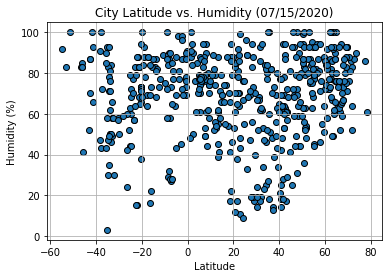

In [29]:
x_values = city_data['Lat']
y_values = city_data['Humidity']
plt.scatter(x_values,y_values , edgecolor = "Black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({date})')
plt.grid()
plt.savefig('Images/Lat_vs_Humidity.png')
plt.show()

### Analysis: 
- There is no correlation between humidity and latitude. However, cities at the equator on the northern hemisphere have higher humidities comapred to the southern hemisphere.

## Latitude vs. Cloudiness Plot

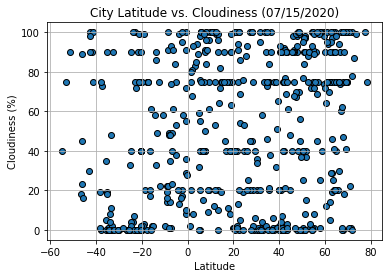

In [30]:
x_values = city_data['Lat']
y_values = city_data['Cloudiness']
plt.scatter(x_values,y_values , edgecolor = "Black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({date})')
plt.grid()
plt.savefig('Images/Lat_vs_Cloudiness.png')
plt.show()

### Analysis: 
- The data is quite widespread showing no relationship between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

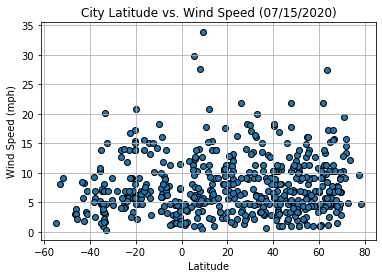

In [31]:
x_values = city_data['Lat']
y_values = city_data['Wind Speed']
plt.scatter(x_values,y_values , edgecolor = "Black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed ({date})')
plt.grid()
plt.savefig('Images/Lat_vs_WindSpeed.png')
plt.show()

### Analysis: 
- Wind Speed shows no correlation with latitude. However, we can see that the wind speeds at this time of the year are mostly below 15 mph. 

## Linear Regression

In [33]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = city_data.loc[city_data["Lat"] >= 0]
northern_df

,City,Max Temp,Lat,Lng,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,81.00,42.60,-73.97,63,77,1.01,US,1594833642
3,Jalu,95.68,29.03,21.55,17,0,8.95,LY,1594833607
6,Talaya,52.23,61.38,152.75,72,94,7.81,RU,1594833643
7,Kiri Buru,76.35,22.08,85.35,92,13,3.62,IN,1594833643
9,Hilo,72.00,19.73,-155.09,88,1,3.36,US,1594833493
...,...,...,...,...,...,...,...,...,...
533,Birnin Kebbi,87.91,12.45,4.20,54,100,9.35,NG,1594833753
534,Viranşehir,92.50,37.24,39.76,13,6,8.66,TR,1594833753
535,Puerto Escondido,82.40,15.85,-97.07,74,75,5.82,MX,1594833754
536,Rome,82.00,43.21,-75.46,57,1,4.70,US,1594833724


In [34]:
southern_df = city_data.loc[city_data["Lat"] <= 0]
southern_df

,City,Max Temp,Lat,Lng,Humidity,Cloudiness,Wind Speed,Country,Date
1,Bredasdorp,50.00,-34.53,20.04,71,1,6.93,ZA,1594833642
2,Yulara,39.20,-25.24,130.99,44,0,4.70,AU,1594833642
4,Sechura,71.01,-5.56,-80.82,64,84,7.83,PE,1594833642
5,Puerto Ayora,70.00,-0.74,-90.35,88,72,4.00,EC,1594833621
8,Swellendam,50.00,-34.02,20.44,71,1,6.93,ZA,1594833643
...,...,...,...,...,...,...,...,...,...
516,Barra do Garças,91.56,-15.89,-52.26,22,0,7.65,BR,1594833563
518,Srandakan,75.52,-7.94,110.25,90,48,8.08,ID,1594833749
519,Tres Arroyos,52.30,-38.37,-60.28,47,1,9.35,AR,1594833750
530,Sijunjung,72.48,-0.69,100.95,90,10,1.43,ID,1594833752


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5298048279825646


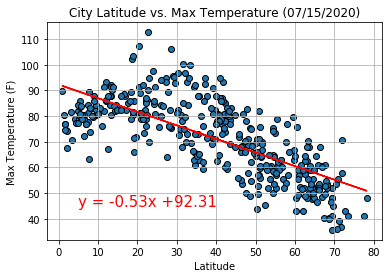

In [36]:
# Scatter Plt
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
plt.scatter(x_values,y_values , edgecolor = "Black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature ({date})')
plt.grid()

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,45),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

plt.savefig('Images/NHS_Lat_vs_Temp.png')

plt.show()

### Analysis: 
- The temperature and latitude in northern hemisphere are negatively correlated. The r-squared value of 0.53 shows that the two are moderately correlated. This is beacuse the further we move away from the equator the colder it gets. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7355895559694346


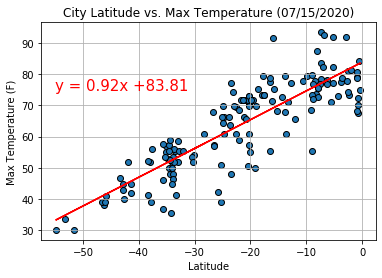

In [37]:
# Plot
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
plt.scatter(x_values,y_values , edgecolor = "Black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature ({date})')
plt.grid()

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,75),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

plt.savefig('Images/SHS_Lat_vs_Temp.png')

plt.show()

### Analysis: 
- The temperature and latitude in the southern hemisphere are postively correlated with a r-squared value of 0.74 which shows a strong relationship between the two. The temperature rises as we get closer to the equator. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.021310709734741876


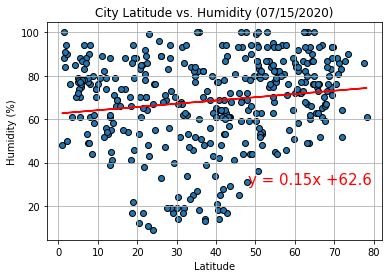

In [38]:
# Plot
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
plt.scatter(x_values,y_values , edgecolor = "Black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({date})')
plt.grid()

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(48,30),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

plt.savefig('Images/NHS_Lat_vs_Humidity.png')

plt.show()

### Analysis: 
- There is no correlation between latitude and humdity in the northern hemisphere. The r-squared value of 0.02 confirms the observation. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.005739452872903745


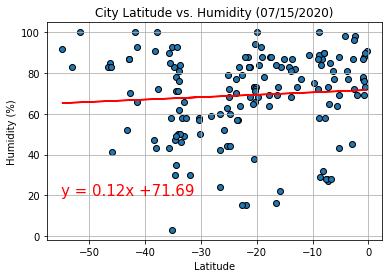

In [39]:
# Plot
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
plt.scatter(x_values,y_values , edgecolor = "Black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({date})')
plt.grid()

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

plt.savefig('Images/SHS_Lat_vs_Humidity.png')

plt.show()

### Analysis: 
- As observed in northern hemisphere, the southern hemisphere has a r-squared value of 0.005 which confirms no correlation between latitude and humidity. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0025691906009060327


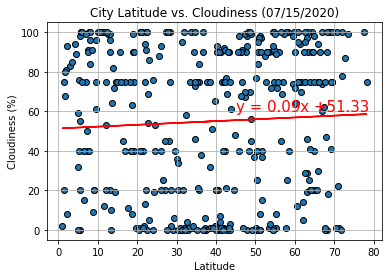

In [41]:
# Plot
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
plt.scatter(x_values,y_values , edgecolor = "Black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({date})')
plt.grid()

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,60),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

plt.savefig('Images/NHS_Lat_vs_Cloudiness.png')

plt.show()

### Analysis: 
- There is no correlation between latitude and cloudiness in the northern hemisphere. 


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.016670880716909225


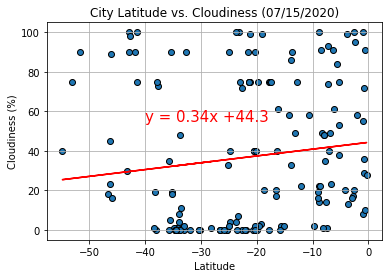

In [42]:
# Plot
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
plt.scatter(x_values,y_values , edgecolor = "Black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({date})')
plt.grid()

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,55),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

plt.savefig('Images/SHS_Lat_vs_Cloudiness.png')

plt.show()

### Analysis: 
- No correlation observed between latitude and cloudiness for southern hemisphere. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 2.7436779522573444e-05


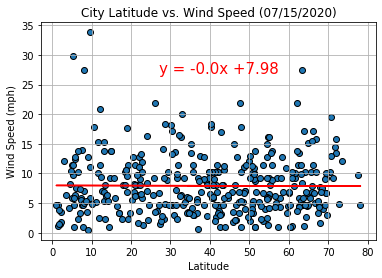

In [44]:
# Plot
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
plt.scatter(x_values,y_values , edgecolor = "Black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed ({date})')
plt.grid()

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(27,27),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

plt.savefig('Images/NHS_Lat_vs_WindSpeed.png')

plt.show()

### Analysis: 
- The r-squared value of approximately 0 shows that there is no correlation between latitude and wind speed in northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0085450505973972


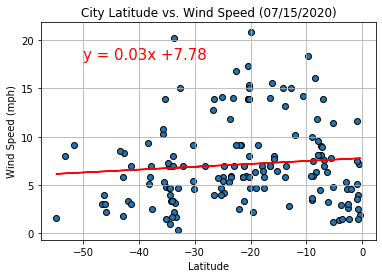

In [45]:
# Plot
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
plt.scatter(x_values,y_values , edgecolor = "Black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed ({date})')
plt.grid()

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,18),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

plt.savefig('Images/SHS_Lat_vs_WindSpeed.png')

plt.show()

### Analysis: 
- No correlation exists between latitude and wind speed in the southern hemisphere. 